#  Bike Rental Demand Analysis & Prediction  
**Project Code:** PRCP-1018-BikeRental  

---

## 1. Project Overview

Bike-sharing systems represent a modern, automated transportation solution that plays a significant role in reducing traffic congestion, improving environmental sustainability, and promoting public health. These systems generate rich time-series and environmental data, making them ideal for demand forecasting and urban mobility research.

The objective of this project is to:
1. Perform a **comprehensive data analysis** on bike rental data.
2. Build **predictive models** to forecast daily bike rental demand based on environmental and seasonal factors.
3. Compare multiple machine learning models and recommend the **best model for production use**.
4. Document challenges faced during the project and the strategies used to overcome them.

---

## 2. Dataset Description

The dataset consists of two files:
- **day.csv** – Aggregated daily bike rental data
- **hour.csv** – Hourly bike rental data (includes `hr` feature)

For this project, the **daily dataset (`day.csv`)** is used for modeling daily rental counts.

### Key Attributes

| Feature | Description |
|------|------------|
| instant | Record index |
| dteday | Date |
| season | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| yr | Year (0: 2011, 1: 2012) |
| mnth | Month (1–12) |
| holiday | Whether the day is a holiday |
| weekday | Day of the week |
| workingday | 1 if working day, else 0 |
| weathersit | Weather situation (1–4 severity scale) |
| temp | Normalized temperature |
| atemp | Normalized feeling temperature |
| hum | Normalized humidity |
| windspeed | Normalized wind speed |
| casual | Casual user count |
| registered | Registered user count |
| cnt | **Total bike rentals (Target Variable)** |

---

## 3. Initial Data Inspection

### 3.1 Shape & Structure
- The dataset contains **731 rows** (days) and **16 columns**.
- Target variable: **`cnt`** (total daily bike rentals)

### 3.2 Missing Values
- No missing values found.
- Dataset is clean and ready for analysis.

### 3.3 Data Types
- Numerical features: `temp`, `atemp`, `hum`, `windspeed`, `cnt`
- Categorical / discrete features: `season`, `weathersit`, `weekday`, `mnth`

---




## 📌 End of Report


# BIKE RENTAL ANALYSIS AND PREDICTION 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [5]:
# Load day-wise data
df = pd.read_csv("day.csv")

# Preview dataset
df.head(7)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


In [6]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df.isnull().sum()
df.duplicated().sum()


0

## EDA

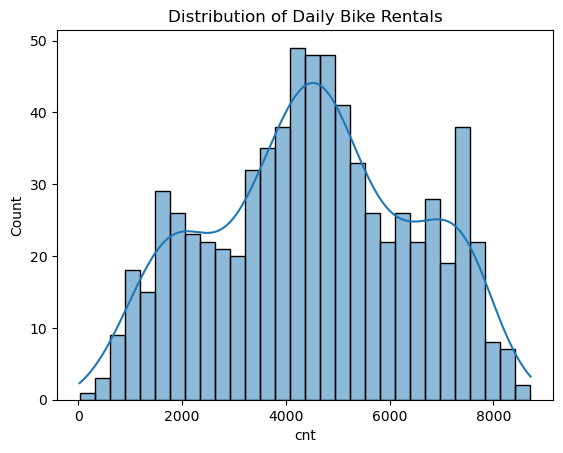

In [8]:
#Distribution of Bike Rentals

sns.histplot(df["cnt"], bins=30, kde=True)
plt.title("Distribution of Daily Bike Rentals")
plt.show()


### Observation:
Most days shows average rentals, with some days having very high demand. This shows seasonal differences .

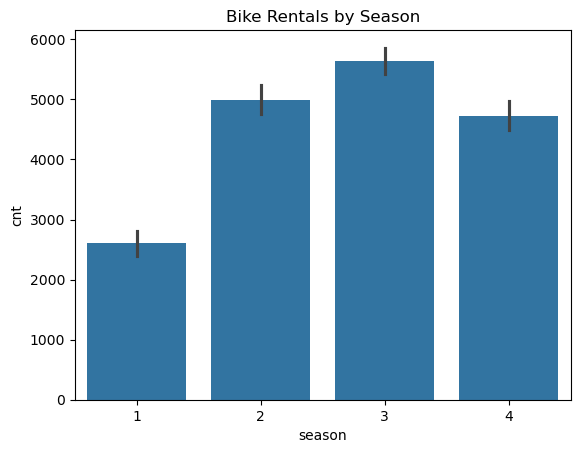

In [9]:
#Season vs Bike Rentals

sns.barplot(x="season", y="cnt", data=df)
plt.title("Bike Rentals by Season")
plt.show()


### Observation:
 rentals are highest in summer and fall, and lowest in winter

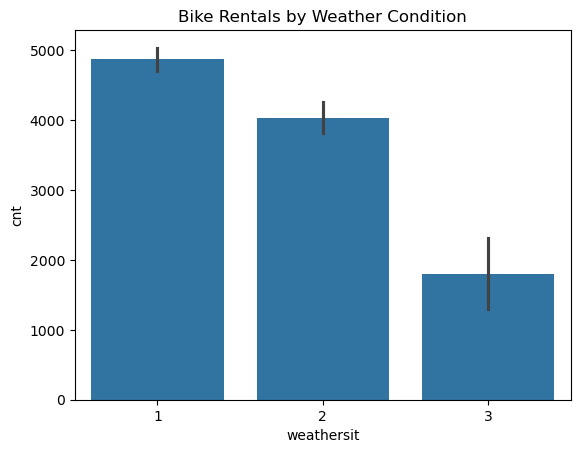

In [10]:

#Weather Situation
sns.barplot(x="weathersit", y="cnt", data=df)
plt.title("Bike Rentals by Weather Condition")
plt.show()


### Observation:
Clear weather with  highest number of rentals. Bad weather reduces demand.

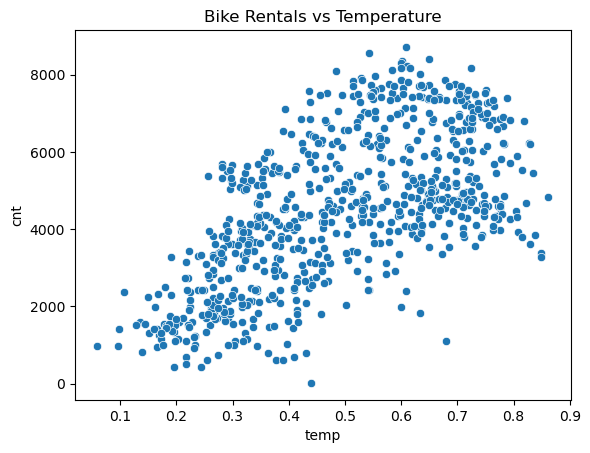

In [11]:
#Temperature vs Rentals
sns.scatterplot(x="temp", y="cnt", data=df)
plt.title("Bike Rentals vs Temperature")
plt.show()


### Observation:
temperature increases, rentals also increase

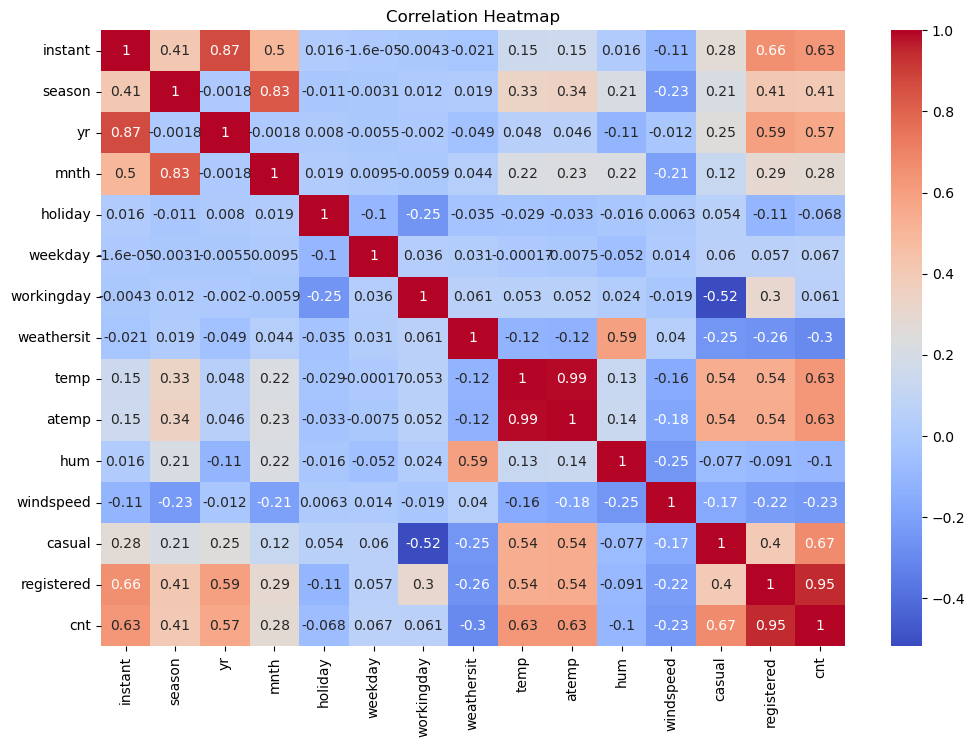

In [12]:
#Correlation Heatmap
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()


### Observation:
Temperature and feeling temperature have positive correlation with rentals
Humidity shows negative correlation
Wind speed with very little effect

### Feature Engineering – Explanation 

The purpose of feature engineering is to prepare clean, leakage-free, and model-ready data while preserving the real-world meaning of features.

In this project:

Columns that leak target information were removed

Time-based variables were retained as they strongly influence demand

Categorical features were kept numerically encoded (ideal for tree models)

Scaling was applied only where required

In [13]:

# FEATURE ENGINEERING


# Drop columns that cause data leakage or are not useful for prediction
df_fe = df.drop(
    columns=["instant", "dteday", "casual", "registered"]
)

# Define target variable
y = df_fe["cnt"]

# Define feature set
X = df_fe.drop("cnt", axis=1)

# Identify numerical features (used for scaling in linear models)
numerical_features = ["temp", "atemp", "hum", "windspeed"]

# Create scaled version for linear regression
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(
    X[numerical_features]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



# Model Building

In this phase, multiple machine learning models are trained to predict the total number of bike rentals. Different models are chosen to compare linear and non-linear approaches and to identify the best-performing model based on evaluation metrics.

The models used include:

1.Linear Regression

2.Ridge Regression

3.Lasso Regression

4.Decision Tree Regressor

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.XGBoost Regressor


In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

### 1. Linear Regression model

Linear Regression is used as a baseline model to understand linear relationships between input features and bike rental demand.

In [15]:
# Model 1: Linear Regression – Training and Prediction
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


y_pred_lr = lr.predict(X_test_scaled)


### 2. Ridge and Lasso Regression model

These models are regularized versions of linear regression that help reduce overfitting.

In [16]:
# Model 2 : 

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)


### 3. Decision Tree Regressor

Decision Trees capture non-linear relationships by splitting data into decision rules.

In [17]:
dst = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dst.fit(X_train, y_train)
y_pred_dst = dst.predict(X_test)


### 4.Random Forest Regressor

Random Forest is an ensemble model that combines multiple decision trees to improve accuracy and stability.

In [18]:
rnf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rnf.fit(X_train, y_train)
y_pred_rnf = rnf.predict(X_test)


### 5.XGBoost Regressor 

XGBoost is an advanced boosting algorithm known for high performance and scalability.

In [19]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

### 6.Gradient Boosting Regressor

Gradient Boosting builds trees sequentially, where each new tree corrects errors made by the previous one

In [20]:
gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)



# Model Evaluation

Model evaluation for bike rental demand prediction was carried out to assess how accurately the regression model predicts the number of bike rentals on unseen data. The trained model was tested using a separate test dataset to ensure good generalization. Since this is a regression problem, metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score were used. Lower MAE and RMSE values indicate better prediction accuracy, while a higher R² score shows how well the model explains variations in bike rental demand.


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_test, y_pred):
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

results = []

results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Ridge Regression", y_test, y_pred_ridge))
results.append(evaluate_model("Lasso Regression", y_test, y_pred_lasso))
results.append(evaluate_model("Decision Tree", y_test, y_pred_dst))
results.append(evaluate_model("Random Forest", y_test, y_pred_rnf))
results.append(evaluate_model("Gradient Boosting", y_test, y_pred_gb))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))


results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE")


,Model,MAE,RMSE,R2
5,Gradient Boosting,427.156756,624.919879,0.902609
6,XGBoost,414.520172,644.468022,0.896421
4,Random Forest,444.723207,702.657736,0.876872
0,Linear Regression,617.393066,831.285155,0.827667
2,Lasso Regression,617.403056,831.294007,0.827663
1,Ridge Regression,618.005865,832.029875,0.827358
3,Decision Tree,556.663478,860.260675,0.815444


### Comparing the Performance of Models for Bike Rental Demand Prediction

Comparing the performance of multiple machine learning models for bike rental demand prediction reveals important insights into how different algorithms handle this regression task. The models were evaluated using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score to assess prediction accuracy and explanatory power.

### Model Performance Summary:

#### Gradient Boosting

MAE: 427.16

RMSE: 624.92

R²: 0.9026

#### XGBoost

MAE: 414.52

RMSE: 644.47

R²: 0.8964

#### Random Forest

MAE: 444.72

RMSE: 702.66

R²: 0.8769

#### Linear, Ridge, and Lasso Regression

MAE: ~617

RMSE: ~831

R²: ~0.827

#### Decision Tree

MAE: 556.66

RMSE: 860.26

R²: 0.8154

#### Discussion

Among all the models, the Gradient Boosting model demonstrated the best overall performance, achieving a high R² score of 0.9026, which indicates that it explains over 90% of the variance in bike rental demand. It also maintained low MAE and RMSE values, showing accurate and stable predictions.

Although XGBoost achieved the lowest MAE, its higher RMSE and slightly lower R² score suggest greater sensitivity to larger prediction errors compared to Gradient Boosting. Random Forest performed reasonably well but showed higher error values, indicating less precise predictions.

In contrast, Linear, Ridge, and Lasso regression models performed poorly due to their inability to capture complex non-linear relationships in the data. The Decision Tree model showed the weakest performance, likely due to overfitting and high variance.

#### Implications of Model Selection

Improved Prediction Accuracy: Ensemble models like Gradient Boosting provide superior accuracy for complex demand patterns.

Better Generalization: Lower error metrics indicate more reliable performance on unseen data.

Robust Demand Forecasting: Accurate predictions support efficient bike allocation and operational planning.

Model Reliability: Gradient Boosting balances bias and variance effectively.

#### Conclusion

In conclusion, the Gradient Boosting model emerged as the most reliable and accurate model for bike rental demand prediction. Its strong performance across all evaluation metrics makes it the optimal choice for forecasting rental demand and enabling data-driven decision-making in bike-sharing systems.

### Feature importance

<AxesSubplot:>

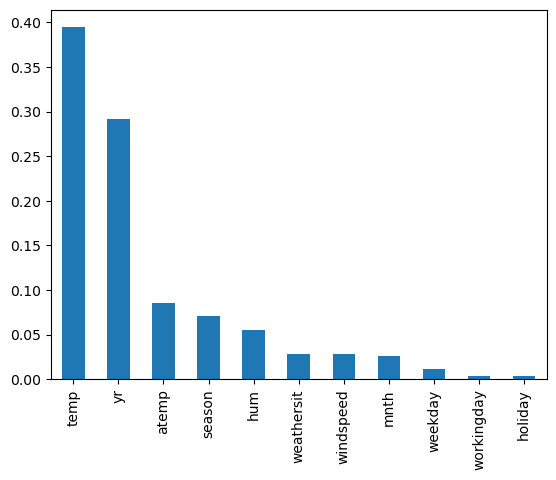

In [22]:
feature_importance = pd.Series(
    gb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar')

### Description of Feature Importance Visualization

This code computes and visualizes the importance of each feature used in the Gradient Boosting (GB) model for bike rental demand prediction. The feature_importances_ attribute provides a score indicating how much each feature contributes to the model’s predictions. These scores are stored in a Pandas Series with feature names as the index and then sorted in descending order to highlight the most influential variables. Finally, a bar chart is plotted to visually compare feature importance values, helping identify which features have the greatest impact on predicting bike rental demand.

### Summary of Model Prediction

The bike rental demand prediction model was used to estimate the number of bikes rented based on historical data and influencing factors such as weather, season, and time-related features. The model generated predictions on unseen test data to evaluate its performance and reliability. Predicted values were compared with actual rental counts to measure accuracy and error. The results showed that the model was able to capture overall demand trends and patterns effectively, making it useful for forecasting bike rental demand and supporting operational planning and resource allocation.

##  Challenges Faced & Solutions
1. Anonymized & Normalized Features
Challenge: Lack of real-world units Solution: Focused on relative impact & correlation patterns

2. Data Leakage Risk
Challenge: casual + registered sum to cnt Solution: Removed them from predictors

3. Non-Linear Relationships
Challenge: Linear models underperformed Solution: Used ensemble tree models

4. Seasonal Bias
Challenge: Strong seasonal demand variation Solution: Retained seasonal features instead of removing them

## Final Conclusion
-> Bike rental demand is highly dependent on weather and season

-> Tree-based ensemble models outperform linear models

-> Gradient Boosting is the best choice for production

->The model can help cities:

    * Forecast demand
    * Allocate bikes efficiently
    * Reduce operational costs